In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.callbacks import TensorBoard # event 알려주는 것 customizing 

In [2]:
# layer 마다 값을 모으는데 어떤 기준 이상 넘어가면 정보가 전달되고 
# 넘어가지 않으면 정보가 전달되지 않는데 이 기준이 Activation

In [3]:
model = Sequential()

In [4]:
model.add(Dense(32, input_dim=784)) # 첫번째 layer 만들기 -> input layer => input_dim / numpy -> shape, dtype

In [5]:
model.add(Activation('relu')) # relu 라는 activation function 사용 
# layer가 많으면 학습에 문제가 생기는데 이에 따른 gradient vanishing 문제를 relu가 해결 

In [6]:
model.add(Dense(10)) # Output layer -> 분류할 최종 데이터 개수 

In [7]:
model.add(Activation('softmax'))

In [8]:
# 함수형 패러다임이므로 증명가능성이 있다. => 위 코드를 전부 수행하면 computational graph를 그린다.

In [9]:
# compile -> 만들어진 computational graph를 어떻게 효율적으로 계산하는가?
# 3개 이상의 분류 => categorical_crossentropy
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
# for a binary classification problem
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [11]:
# for a mean squared error regression problem
model.compile(optimizer='rmsprop',
             loss='mse')

In [12]:
# gradient descent -> 최저점 찾기 (미분)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(32, activation='relu', input_dim=100)) # input_dim = input_shape

In [15]:
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [17]:
# label encoding 으로 추측 -> node가 1개만 있음 

In [18]:
# https://keras.io/optimizers/
# Generate dummy data
import numpy as np 
data = np.random.random((1000,100)) # 1000: 
labels = np.random.randint(2,size=(1000,1)) # 행이 1000개 열이 1개 

In [19]:
data[0] # 한꺼번에 100개짜리 데이터 삽입 

array([0.43376642, 0.14920495, 0.70365584, 0.18467707, 0.61183466,
       0.9774551 , 0.51688624, 0.02241455, 0.86670181, 0.2961622 ,
       0.98703004, 0.08691906, 0.10000556, 0.38742067, 0.52257402,
       0.81556518, 0.39576598, 0.98441602, 0.68470559, 0.893292  ,
       0.91513566, 0.62938545, 0.63849908, 0.48309073, 0.58019924,
       0.42360438, 0.65968369, 0.15182819, 0.55886709, 0.08927848,
       0.71702233, 0.79778848, 0.01756943, 0.13507784, 0.33834605,
       0.5287194 , 0.02712984, 0.26276425, 0.78221491, 0.93223665,
       0.51319522, 0.75107273, 0.60141107, 0.25691595, 0.08378561,
       0.66643747, 0.8712799 , 0.28247119, 0.48199512, 0.22411575,
       0.47522232, 0.43096218, 0.22315991, 0.33167585, 0.88704106,
       0.51973985, 0.38665176, 0.8603019 , 0.07249047, 0.54584816,
       0.46065629, 0.6479941 , 0.55784858, 0.74910506, 0.98981936,
       0.16695742, 0.741255  , 0.71226678, 0.59419948, 0.92137795,
       0.55462926, 0.06002848, 0.23108523, 0.65180945, 0.39929

In [20]:
data.shape

(1000, 100)

In [21]:
labels # 0과 1 두 개만 만듦 

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [22]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32) # X : data , Y : labels, 32개씩 10번 학습시킨다. 
# 전체 데이터로 1번 학습시키는 것을 epoch 이라고 함 
# training 성능만 좋아짐  loss : 실제값 - 예측값 
# batch_size: 한꺼번에 학습할 양 

Epoch 1/10
1000/1000 [==============================] - 0s 266us/sample - loss: 0.7173 - accuracy: 0.4880
Epoch 2/10
1000/1000 [==============================] - 0s 50us/sample - loss: 0.7036 - accuracy: 0.5140
Epoch 3/10
1000/1000 [==============================] - 0s 46us/sample - loss: 0.6956 - accuracy: 0.5450
Epoch 4/10
1000/1000 [==============================] - 0s 44us/sample - loss: 0.6948 - accuracy: 0.5410
Epoch 5/10
1000/1000 [==============================] - 0s 44us/sample - loss: 0.6856 - accuracy: 0.5470
Epoch 6/10
1000/1000 [==============================] - 0s 50us/sample - loss: 0.6857 - accuracy: 0.5700
Epoch 7/10
1000/1000 [==============================] - 0s 43us/sample - loss: 0.6816 - accuracy: 0.5660
Epoch 8/10
1000/1000 [==============================] - 0s 42us/sample - loss: 0.6785 - accuracy: 0.5670
Epoch 9/10
1000/1000 [==============================] - 0s 43us/sample - loss: 0.6750 - accuracy: 0.5760
Epoch 10/10
1000/1000 [==============================]

In [23]:
tb = TensorBoard() #log_dir='./Graph',histogram_freq=0, write_graph=True, write_images=True)

In [24]:
model.fit(data,labels,batch_size=32,epochs=10,callbacks=[tb])

Epoch 1/10
1000/1000 [==============================] - 0s 67us/sample - loss: 0.6673 - accuracy: 0.5880
Epoch 2/10
1000/1000 [==============================] - 0s 50us/sample - loss: 0.6628 - accuracy: 0.5970
Epoch 3/10
1000/1000 [==============================] - 0s 54us/sample - loss: 0.6626 - accuracy: 0.6120
Epoch 4/10
1000/1000 [==============================] - 0s 49us/sample - loss: 0.6554 - accuracy: 0.6250
Epoch 5/10
1000/1000 [==============================] - 0s 49us/sample - loss: 0.6541 - accuracy: 0.6240
Epoch 6/10
1000/1000 [==============================] - 0s 54us/sample - loss: 0.6520 - accuracy: 0.6230
Epoch 7/10
1000/1000 [==============================] - 0s 58us/sample - loss: 0.6459 - accuracy: 0.6320
Epoch 8/10
1000/1000 [==============================] - 0s 79us/sample - loss: 0.6435 - accuracy: 0.6320
Epoch 9/10
1000/1000 [==============================] - 0s 61us/sample - loss: 0.6382 - accuracy: 0.6350
Epoch 10/10
1000/1000 [==============================] 

In [ ]:
!tensorboard --logdir=./logs

TensorBoard 1.14.0a20190301 at http://jeong-gyoyun-ui-MacBook-Pro.local:6006 (Press CTRL+C to quit)


In [ ]:
# 위 명령을 쓰면 computational graph를 그릴 수 있고 matplotlib으로 그래프를 그릴 필요가 없어진다. 
# 위 명령은 tensorflow의 고유기능이다. 

In [25]:
from tensorflow.keras.utils import plot_model 

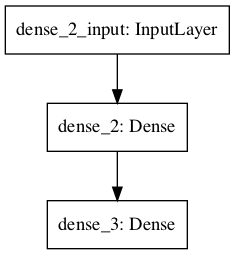

In [26]:
plot_model(model, to_file='./model.png')